### 01.

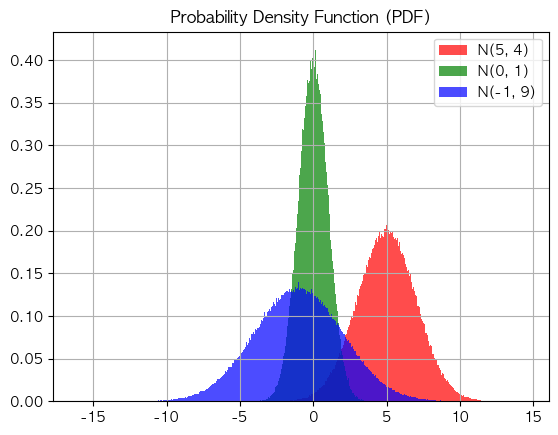

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 표준 정규분포를 일반 정규븐포로 변환시키기 --> np.random.randn(1000000) * 표준편차 + 평균
n = 1000000
a = np.random.randn(n) * 2 + 5 # 평균:5, 표준편차:2
b = np.random.randn(n) * 1 + 0 # 평균:0, 표준편차:1
c = np.random.randn(n) * 3 + (-1) # 평균:-1, 표준편차:3

# 데이터 시각화
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # - 부호가 깨지지 않도록 설정

plt.figure()
plt.title('Probability Density Function (PDF)')
plt.hist(a, bins=1000, density=True, alpha=0.7, color='red', label='N(5, 4)')
plt.hist(b, bins=1000, density=True, alpha=0.7, color='green', label='N(0, 1)')
plt.hist(c, bins=1000, density=True, alpha=0.7, color='blue', label='N(-1, 9)')

plt.legend()
plt.grid(True)
plt.show()

### 02.

    ✅ 목표 요약
	• gangnam_station.csv 파일에서 시간(h) 별로 공기질 데이터를 모아 Box plot 으로 시각화하기
        •	단, 외부 라이브러리(pandas 등) 사용 금지!
        •	그래프 크기: figsize=(10, 3)
        •	제목, 축 이름, 격자 설정 필요
        •	tick_labels 이용해서 x축에 시간(0~23) 표시

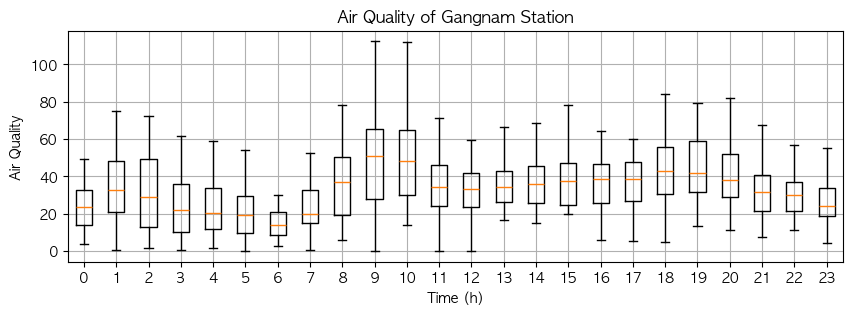

In [83]:
import csv
import matplotlib.pyplot as plt

f = open('gangnam_station.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

# 0시부터 23시까지의 공기질 데이터를 담을 리스트 생성
hour_data = [[] for _ in range(24)]

for row in data:
    if row[2] != '' and row[3] != '':
        hour = int(row[2].split()[1]) # ex) 2024-01-01 00 <-- 여기서 시간만 추출
        value = float(row[3])
        hour_data[hour].append(value)
f.close()

# 데이터 시각화하기
plt.figure(figsize=(10,3))
plt.title('Air Quality of Gangnam Station')
plt.boxplot(hour_data, showfliers=False) # 이상치 제거
plt.xlabel('Time (h)')
plt.ylabel('Air Quality')

plt.xticks(ticks=range(1, 25), labels=range(24)) # ticks: x축의 위치 --> 1~24 / labels: 눈금에 표시할 숫자(즉, 시각!) --> 0~23
plt.grid(True)
plt.show()

### 03.

📌 목표

        - 빈 값을 제외하고,
        - 날짜에서 월(month)을 추출하여
        - 각 월별 평균 강수량을 계산하고
        - 이를 막대그래프(bar chart)로 시각화

#### ✅ ticks
    plt.xticks(눈금을 적용할 x축의 실제 위치, 해당 위치에 나타낼 값)

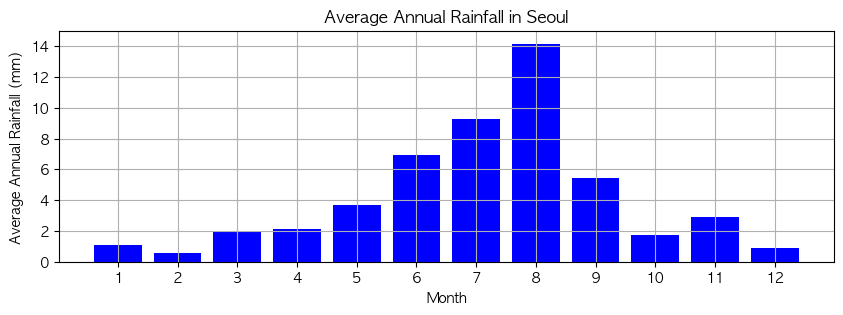

In [82]:
import csv
import matplotlib.pyplot as plt

f= open('rainfall.csv', 'r', encoding='cp949')
data = csv.reader(f)

# 메타정보 7줄 건너뛰기
for _ in range(7):
    next(data)
header = next(data)

# 1~12월 까지의 월별 데이터를 담을 리스트 생성
monthly_data = [[] for _ in range(12)]

# 1) 월별 강수량 데이터 수집
for row in data:
    if row[0] != '':
        month = int(row[0].split('-')[1])
        rainfall = float(row[2]) if row[2] != '' else 0.0 # 빈값이면 0.0으로 처리함 <-- float로 받고있기 때문
        monthly_data[month -1].append(rainfall)
         
# 2) 월별 평균 강수량 계산
monthly_avg = []  
for i in monthly_data:
    if len(i) > 0:
        monthly_avg.append(sum(i) / len(i)) # 달의 평균 구하기
    else:
        monthly_avg.append(0) # 데이터가 없을 경우 0으로 표시

f.close()

# 3) 데이터 시각화하기
plt.figure(figsize=(10,3))
plt.bar(range(1, 13), monthly_avg, color='blue')
plt.title('Average Annual Rainfall in Seoul')
plt.xlabel('Month')
plt.ylabel('Average Annual Rainfall (mm)')
plt.xticks(range(1, 13))
plt.yticks(range(0, 16, 2))  # y축 --> 0부터 14까지 2 간격으로 눈금 표시
plt.ylim(0, 15)  # 최대값이 14 정도니까 살짝 위로만 여유 주기
plt.grid(True, axis='both', which='both')  # x축과 y축 모두에 격자
plt.show()
    


### 04.

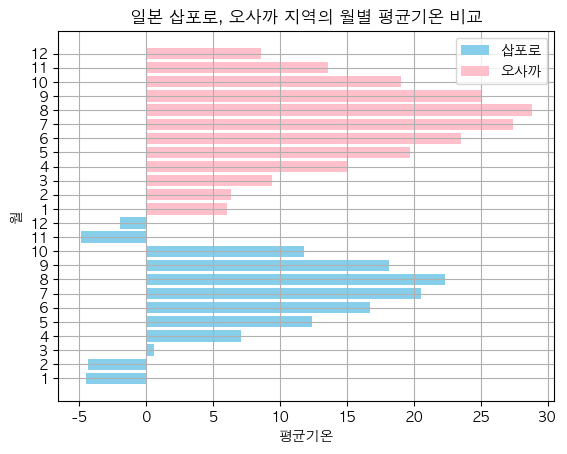

In [162]:
import csv
import matplotlib.pyplot as plt

f = open("world_temperature.csv", 'r', encoding="cp949")
data = csv.reader(f)

# 삽포로와 오사까의 월별 기온을 저장할 리스트
sapporo = [0] * 12
osaka = [0] * 12

for _ in range(5):
    next(data)
header = next(data) # 6번쨰 줄이 헤더라 5줄 건너뜀

# 삿포로와 오사카의 기온 저장
for row in data:
    if row[1] == '삽포로':
        month = int(row[5]) -1
        temp = float(row[6])
        sapporo[month] = temp
        
    if row[1] == '오사까':
        month = int(row[5]) -1
        temp = float(row[6])
        osaka[month] = temp
f.close()

# 폰트 설정
#plt.rc('font', family='Malgun Gothic')  # Windows 기준 폰트
plt.rcParams['font.family'] = 'AppleGothic' # Mac 기준
plt.rcParams['axes.unicode_minus'] = False # - 글자가 깨지지 않기 위함

# 1) y축 위치 (0~23)
y_pos = list(range(24))

# 2) y축 라벨
y_labels = list(range(1, 13)) + list(range(1, 13))  # 삿포로(1월~12월) + 오사카(1월~12월)

# 3) 기온 데이터 순서 맞게 구성
temps = sapporo + osaka
colors = ['skyblue'] * 12 + ['pink'] * 12

# 4) 라벨은 첫 막대에만 표시
labels = ['삽포로'] + [''] * 11 + ['오사까'] + [''] * 11

# 5) 그래프 그리기
for i in range(24):
    plt.barh(y_pos[i], temps[i], color=colors[i], label=labels[i])

plt.yticks(y_pos, y_labels)
plt.title("일본 삽포로, 오사까 지역의 월별 평균기온 비교")
plt.xlabel("평균기온")
plt.ylabel("월")
plt.legend()
plt.grid(True)
plt.show()

In [151]:
print(y_pos)
print(y_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [112]:
print(header)

# row[0] = 일본
# row[1] = 오사까, 삽포로
# row[6] 이 평균기온임

['국가', '지점명', '지점번호', '시작년도', '종료년도', '월', '평균기온(°C)', '최고기온(°C)', '최저기온(°C)', '강수량(mm)', '일조시간(hr)']


### 05.

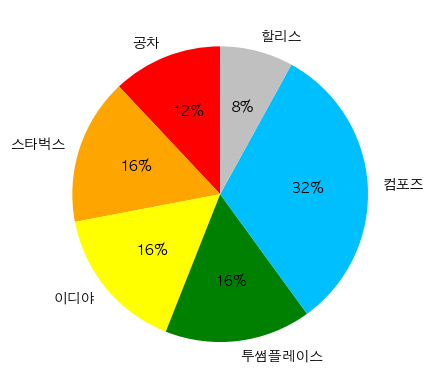

In [107]:
import csv
import matplotlib.pyplot as plt

f = open('busan_coffe.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

# 조사 대상 커피 브랜드
brands = ['공차', '스타벅스', '이디야', '투썸플레이스', '컴포즈', '할리스']
brand_counter = [0] * len(brands)

for row in data:
    name = row[0]
    for i in range(len(brands)):
        if brands[i] in name: # 브랜드 이름이 포함되어 있으면
            brand_counter[i] += 1 # 해당 브랜드 개수 + 1
f.close()

# 데이터 시각화하기
# 폰트 설정
#plt.rc('font', family='Malgun Gothic') # Windows 사용자 기준
plt.rc('font', family='AppleGothic')  # 맥북용 한글 폰트

colors = ['red', 'orange', 'yellow', 'green', 'deepskyblue', 'silver']
plt.pie(brand_counter, labels=brands, autopct='%.0f%%', startangle=90, colors=colors)
plt.show()

### 06.

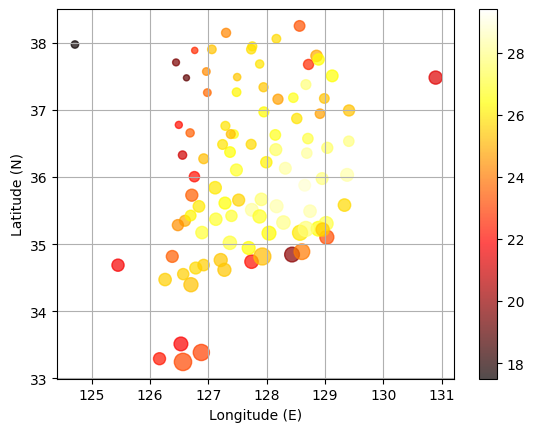

In [78]:
import csv
import matplotlib.pyplot as plt

f = open("korea_temperature.csv", 'r', encoding="cp949")
data = csv.reader(f)
header = next(data)

# 시각화에 사용할 데이터 저장용 리스트
longitudes = []  # 경도 (x축)
latitudes = []   # 위도 (y축)
temps = []       # 최고기온 (점 색상용)
rains = []       # 강수량 (점 크기용)

for row in data:
    # 값 추출 및 실수로 변환 (문자열을 float로 바꿔줘야 함)
    lon = float(row[1])       # 경도
    lat = float(row[2])       # 위도
    high_temp = float(row[5]) # 최고기온
    rain = float(row[6])      # 강수량

    # 각 리스트에 값 저장
    longitudes.append(lon)
    latitudes.append(lat)
    temps.append(high_temp)
    rains.append(rain)

f.close()

# 데이터 시각화 (산점도 그리기)
plt.scatter(longitudes, latitudes,
            c=temps,         # 점 색상: 최고기온
            s=rains,         # 점 크기: 강수량
            cmap='hot',      # 컬러맵 설정
            alpha=0.7)       # 투명도 0.7
# 색상 범례 추가
plt.colorbar()

plt.xlabel("Longitude (E)")  # 경도
plt.ylabel("Latitude (N)")   # 위도
plt.grid(True)
plt.show()

### 07.

In [60]:
import csv

f = open('seoul_old_people.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

# 결과 저장용 리스트
ultra_aged = []  # 초고령사회 리스트
aged = []  # 고령 사회 리스트

for row in data:
    if '서울특별시  (1100000000)' == row[0].strip():
        continue
    name = row[0].split()[-2]  # 구 이름만 추출
    total = int(row[1].replace(',', ''))  # 전체 인구
    elders = int(row[4].replace(',', ''))  # 65세 이상 인구

    ratio = round(elders / total, 3)  # round(비율, 3) 사용 (소수 3째 자리까지)

    if ratio >= 0.2:
        ultra_aged.append((name, ratio))
    elif ratio >= 0.14:
        aged.append((name, ratio))

f.close()

# 결과 출력
print("<초고령 사회로 진입한 지역>")
for i, (name, ratio) in enumerate(ultra_aged, 1): # enumerate는 기본적으로 0부터 시작하기 때문에 1부터 시작하도록 지정함.
    print(f"{i} {name} {ratio:.3f}")

print("\n<고령 사회로 진입한 지역>")
for i, (name, ratio) in enumerate(aged, 1):
    print(f"{i} {name} {ratio:.3f}")

<초고령 사회로 진입한 지역>
1 종로구 0.207
2 중구 0.213
3 중랑구 0.210
4 강북구 0.242
5 도봉구 0.233
6 은평구 0.204
7 구로구 0.203

<고령 사회로 진입한 지역>
1 용산구 0.186
2 성동구 0.180
3 광진구 0.171
4 동대문구 0.198
5 성북구 0.191
6 노원구 0.196
7 서대문구 0.190
8 마포구 0.160
9 양천구 0.178
10 강서구 0.184
11 금천구 0.199
12 영등포구 0.178
13 동작구 0.187
14 관악구 0.178
15 서초구 0.163
16 강남구 0.160
17 송파구 0.169
18 강동구 0.183


### 08.

In [75]:
import csv

f = open('seoul_young_people.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

# 최대값을 저장할 변수들
max_child = 0
max_teen = 0
max_youth = 0

# 각각 해당하는 지역명도 저장
max_child_loc = ""
max_teen_loc = ""
max_youth_loc = ""

for row in data:
    if row[0] == '서울특별시  (1100000000)':
        continue
    loc_name = row[0].split()[-2]
    # 각각 아동/청소년/청년 인구수 추출 (숫자에 포함된 쉼표 제거 후 정수 변환)
    child = int(row[4].replace(',', ''))
    teen = int(row[7].replace(',', ''))
    youth = int(row[10].replace(',', ''))
    
    # 각각 항목별로 인구수의 최대값을 갱신하는 방식
    if child > max_child:
        max_child = child
        max_child_loc = loc_name

    if teen > max_teen:
        max_teen = teen
        max_teen_loc = loc_name

    if youth > max_youth:
        max_youth = youth
        max_youth_loc = loc_name
f.close()

# 결과 출력
print(f"아동이 가장 많이 사는 지역과 아동 인구수:{max_child_loc} {format(max_child, ',')}명")
print(f"청소년이 가장 많이 사는 지역과 청소년 인구수:{max_teen_loc} {format(max_teen, ',')}명")
print(f"청년이 가장 많이 사는 지역과 청년 인구수:{max_youth_loc} {format(max_youth, ',')}명")

아동이 가장 많이 사는 지역과 아동 인구수:송파구 89,030명
청소년이 가장 많이 사는 지역과 청소년 인구수:강남구 97,040명
청년이 가장 많이 사는 지역과 청년 인구수:관악구 166,647명
